In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as mp
import seaborn           as sb

sb.set_theme()

In [2]:
# load data
# requires data to be in the parent directory
postings             = pd.read_csv('../data/postings.csv')
benefits             = pd.read_csv('../data/jobs/benefits.csv')
job_industries       = pd.read_csv('../data/jobs/job_industries.csv')
job_skills           = pd.read_csv('../data/jobs/job_skills.csv')
salaries             = pd.read_csv('../data/jobs/salaries.csv')
companies            = pd.read_csv('../data/companies/companies.csv')
company_industries   = pd.read_csv('../data/companies/company_industries.csv')
company_specialities = pd.read_csv('../data/companies/company_specialities.csv')
employee_counts      = pd.read_csv('../data/companies/employee_counts.csv')

In [3]:
# form the complete job metadata
all_jobs = postings.merge(benefits,       on = 'job_id', how = 'left', suffixes = ('', '_dup'))
all_jobs = all_jobs.merge(job_industries, on = 'job_id', how = 'left', suffixes = ('', '_dup'))
all_jobs = all_jobs.merge(job_skills,     on = 'job_id', how = 'left', suffixes = ('', '_dup'))
all_jobs = all_jobs.merge(salaries,       on = 'job_id', how = 'left', suffixes = ('', '_dup'))

# form the complete company metadata
all_companies = companies    .merge(company_industries,   on = 'company_id', how = 'left', suffixes = ('', '_dup'))
all_companies = all_companies.merge(company_specialities, on = 'company_id', how = 'left', suffixes = ('', '_dup'))
all_companies = all_companies.merge(employee_counts,      on = 'company_id', how = 'left', suffixes = ('', '_dup'))

# remove duplicated columns and rows from the above merging
all_jobs      = all_jobs     .filter(regex = '^(?!.*_dup)').drop_duplicates(subset = ['job_id'])
all_companies = all_companies.filter(regex = '^(?!.*_dup)').drop_duplicates(subset = ['company_id'])

In [4]:
# plot helper
def add_to_plot(fig, ax, **kwargs):
    if xlabel    := kwargs.get('xlabel'):
        ax.set_xlabel(xlabel)
    if ylabel    := kwargs.get('ylabel'):
        ax.set_ylabel(ylabel)
    if title     := kwargs.get('title'):
        ax.set_title(title)
    if xticks    := kwargs.get('xticks'):
        ax.set_xticks(xticks)
    if yticks    := kwargs.get('yticks'):
        ax.set_yticks(yticks)
    if xticksrot := kwargs.get('xticksrot'):
        ax.set_xticklabels(ax.get_xticklabels(), rotation = xticksrot)
    if yticksrot := kwargs.get('yticksrot'):
        ax.set_yticklabels(ax.get_yticklabels(), rotation = yticksrot)
    if kwargs.get('xlog'):
        ax.set_xscale('log')
    if kwargs.get('ylog'):
        ax.set_yscale('log')

    fig.tight_layout()
    fig.show()

/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


closed_time                   122776
skills_desc                   121410
med_salary                    117569
remote_allowed                108603
applies                       100529
inferred                       95114
type                           95114
min_salary                     94056
max_salary                     94056
normalized_salary              87776
salary_id                      87776
compensation_type              87776
currency                       87776
pay_period                     87776
posting_domain                 39968
application_url                36665
formatted_experience_level     29409
fips                           27415
zip_code                       20872
skill_abr                       1753
company_name                    1719
company_id                      1717
views                           1689
industry_id                     1436
description                        7
dtype: int64
speciality      6693
company_size    2774
description      297

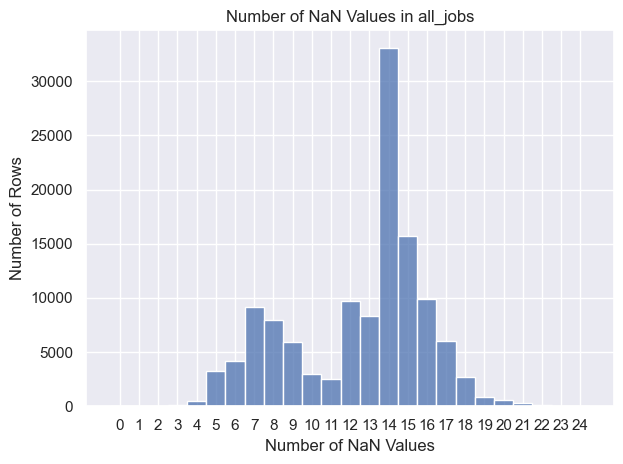

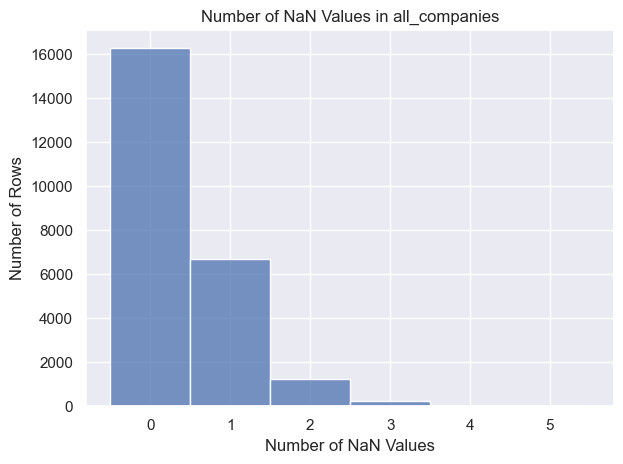

In [5]:
# get a sense of how many NaN values are in the data
def nan_hist(df, title):
    nans = df.isna().sum(axis = 1)

    fig, ax = mp.subplots()

    sb.histplot(nans,
                bins = np.arange(0, nans.max() + 2) - 0.5,
                ax   = ax)

    add_to_plot(fig, ax,
                xlabel = 'Number of NaN Values',
                ylabel = 'Number of Rows',
                title  =  title,
                xticks =  range(0, nans.max() + 1))

    data = df.isnull().sum()

    print(data[data > 0].sort_values(ascending = False))

nan_hist(all_jobs,      'Number of NaN Values in all_jobs')
nan_hist(all_companies, 'Number of NaN Values in all_companies')

In [6]:
# fill NaN values
def nan_fill(df):
    for col in df.columns:
        if not df[col].isna().any():
            continue

        dtype = df[col].dtype

        if pd.api.types.is_numeric_dtype(dtype):
            df[col].fillna(0, inplace = True)
        else:
            df[col].fillna('Not Specified', inplace = True)

nan_fill(all_jobs)
nan_fill(all_companies)

/tmp/ipykernel_1439398/646414447.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Not Specified', inplace = True)
/tmp/ipykernel_1439398/646414447.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [7]:
all_jobs

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,currency,compensation_type,normalized_salary,zip_code,fips,inferred,type,industry_id,skill_abr,salary_id
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,0.0,...,USD,BASE_SALARY,38480.0,8540.0,34021.0,0.0,Not Specified,44.0,MRKT,18531.0
2,1829192,Not Specified,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",0.0,1.0,0.0,...,USD,BASE_SALARY,83200.0,80521.0,8069.0,0.0,Not Specified,0.0,HCPR,8059.0
3,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,0.0,...,USD,BASE_SALARY,55000.0,45202.0,39061.0,0.0,Not Specified,32.0,MGMT,14949.0
5,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,0.0,...,USD,BASE_SALARY,157500.0,11040.0,36059.0,1.0,401(k),9.0,OTHR,11204.0
6,35982263,Not Specified,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",0.0,3.0,0.0,...,USD,BASE_SALARY,70000.0,52601.0,19057.0,0.0,Not Specified,122.0,IT,20809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385764,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,0.0,...,USD,BASE_SALARY,157500.0,94595.0,6013.0,0.0,Medical insurance,9.0,LGL,40701.0
385776,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,0.0,Not Specified,United States,1124131.0,3.0,0.0,...,Not Specified,Not Specified,0.0,0.0,0.0,0.0,Not Specified,6.0,ENG,0.0
385782,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,0.0,Not Specified,"Spokane, WA",90552133.0,3.0,0.0,...,Not Specified,Not Specified,0.0,99201.0,53063.0,0.0,Not Specified,69.0,SALE,0.0
385784,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,0.0,Not Specified,"Texas, United States",2793699.0,4.0,0.0,...,Not Specified,Not Specified,0.0,0.0,0.0,0.0,Not Specified,135.0,BD,0.0


In [8]:
all_companies

,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,employee_count,follower_count,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,IT Services and IT Consulting,Cloud,314102,16253625,1712378162
68,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,Hospitals and Health Care,Healthcare,56873,2185368,1712382540
88,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,IT Services and IT Consulting,Not Specified,79528,3586194,1712870106
92,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,IT Services and IT Consulting,enterprise,192099,9465968,1712642952
207,1033,Accenture,Accenture is a leading global professional ser...,7.0,0,IE,Dublin 2,0,Grand Canal Harbour,https://www.linkedin.com/company/accenture,Business Consulting and Services,Management Consulting,574664,11864908,1712641699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270869,103463217,JRC Services,Not Specified,2.0,0,0,0,0,0,https://www.linkedin.com/company/jrcservices,Facilities Services,Not Specified,0,21,1713552037
270870,103466352,Centent Consulting LLC,Centent Consulting LLC is a reputable human re...,0.0,0,0,0,0,0,https://www.linkedin.com/company/centent-consu...,Business Consulting and Services,Not Specified,0,0,1713550651
270871,103467540,"Kings and Queens Productions, LLC",We are a small but mighty collection of thinke...,0.0,0,0,0,0,0,https://www.linkedin.com/company/kings-and-que...,Broadcast Media Production and Distribution,Not Specified,0,12,1713554225
270872,103468936,WebUnite,Our mission at WebUnite is to offer experience...,0.0,Pennsylvania,US,Southampton,18966,720 2nd Street Pike,https://www.linkedin.com/company/webunite,Business Consulting and Services,Not Specified,0,1,1713535939


/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


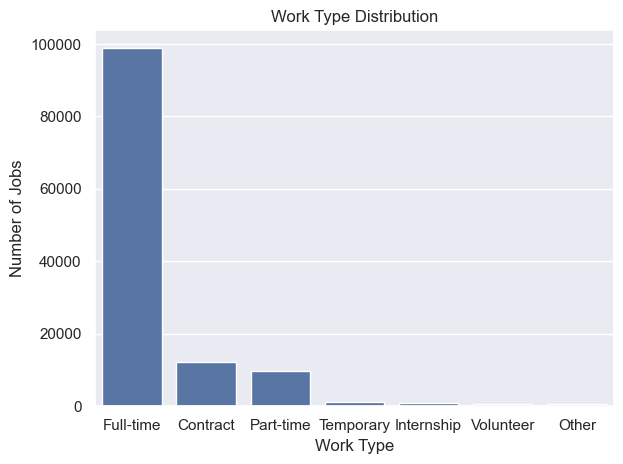

In [9]:
# work type distribution
fig, ax = mp.subplots()

sb.barplot(all_jobs['formatted_work_type'].value_counts(),
           ax = ax)

add_to_plot(fig, ax,
            xlabel = 'Work Type',
            ylabel = 'Number of Jobs',
            title  = 'Work Type Distribution')

/tmp/ipykernel_1439398/1722634218.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = xticksrot)
/tmp/ipykernel_1439398/1722634218.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()
/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


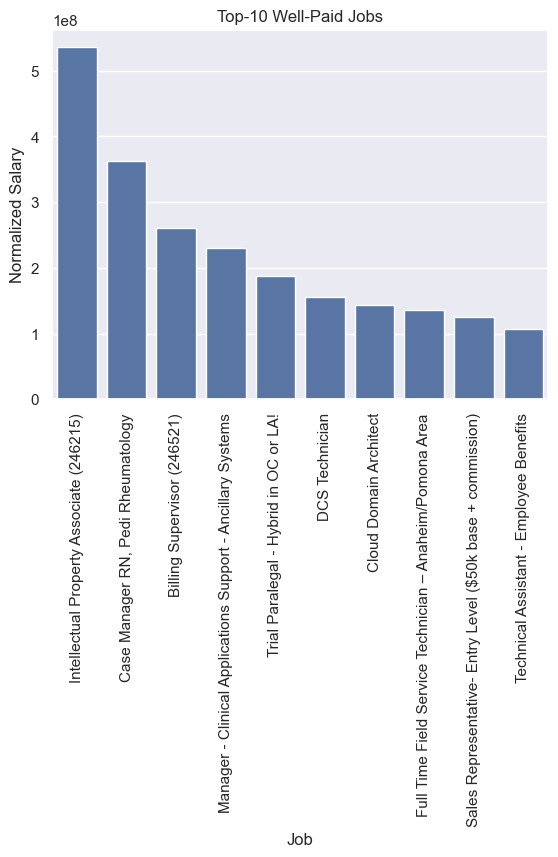

In [10]:
# find 10 jobs with the highest average salary
fig, ax = mp.subplots()

# title is not good enough. we may need to "normalize" it
sb.barplot(all_jobs.groupby('title')['normalized_salary'].mean().reset_index().sort_values(by = 'normalized_salary', ascending = False).head(10),
           x  = 'title',
           y  = 'normalized_salary',
           ax =  ax)

add_to_plot(fig, ax,
            xlabel    = 'Job',
            ylabel    = 'Normalized Salary',
            title     = 'Top-10 Well-Paid Jobs',
            xticksrot =  90)

/tmp/ipykernel_1439398/1722634218.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = xticksrot)
/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


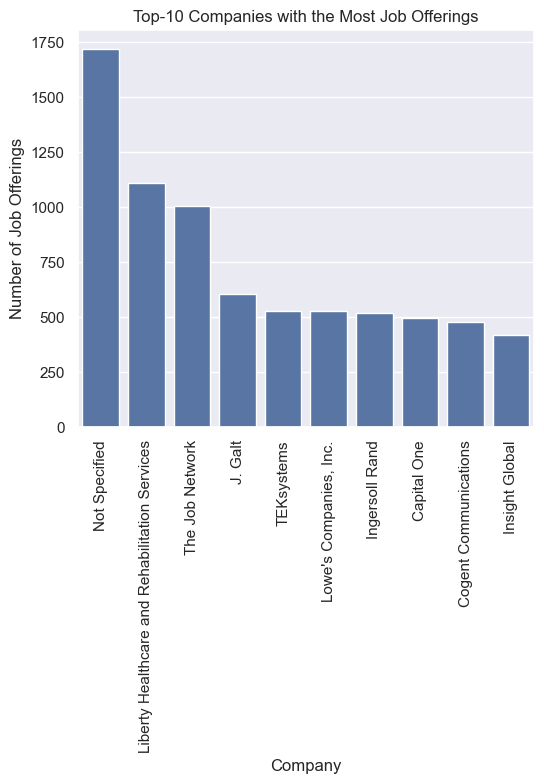

In [11]:
# find 10 companies with the most job offerings
fig, ax = mp.subplots(figsize = (5.6, 8))

map_companies = dict(zip(all_companies['company_id'], all_companies['name']))
# not good
map_companies[0.0] = 'Not Specified'

sb.barplot(all_jobs['company_id'].value_counts().head(10).rename(index = map_companies),
           ax = ax)

add_to_plot(fig, ax,
            xlabel    = 'Company',
            ylabel    = 'Number of Job Offerings',
            title     = 'Top-10 Companies with the Most Job Offerings',
            xticksrot =  90)

/tmp/ipykernel_1439398/1722634218.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = xticksrot)
/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


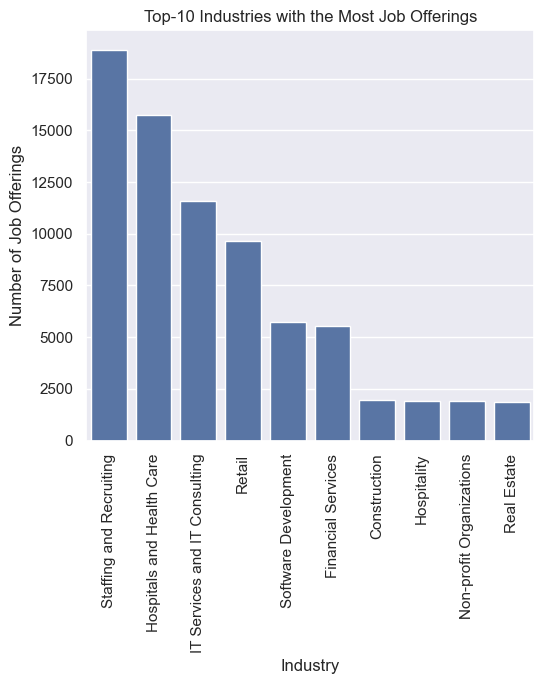

In [12]:
# find 10 industries with the most job offerings
fig, ax = mp.subplots(figsize = (5.6, 7))

sb.barplot(all_jobs.merge(company_industries, on = 'company_id', how = 'left')['industry'].value_counts().head(10),
           ax = ax)

add_to_plot(fig, ax,
            xlabel    = 'Industry',
            ylabel    = 'Number of Job Offerings',
            title     = 'Top-10 Industries with the Most Job Offerings',
            xticksrot =  90)

/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


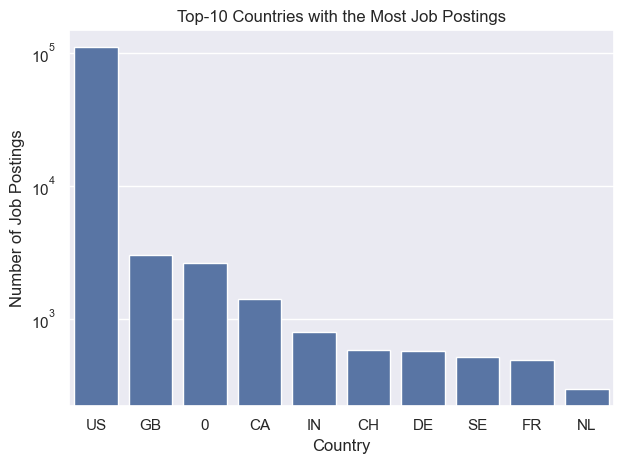

In [13]:
# find 10 countries with the most job postings
fig, ax = mp.subplots()

sb.barplot(all_jobs.merge(companies, on = 'company_id', how = 'left')['country'].value_counts().head(10),
           ax = ax)

add_to_plot(fig, ax,
            xlabel = 'Country',
            ylabel = 'Number of Job Postings',
            title  = 'Top-10 Countries with the Most Job Postings',
            ylog   =  True)

/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


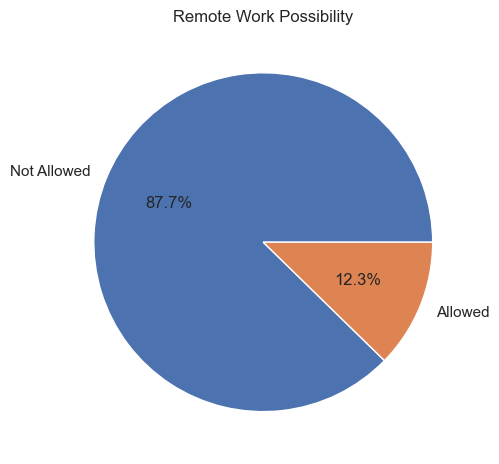

In [14]:
# find the ratio of remote work allowance
fig, ax = mp.subplots()

rem = all_jobs['remote_allowed'].value_counts().rename(index = {0: 'Not Allowed', 1: 'Allowed'})

ax.pie(rem.values, labels = rem.index, autopct = '%1.1f%%')

add_to_plot(fig, ax,
            title = 'Remote Work Possibility')


/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


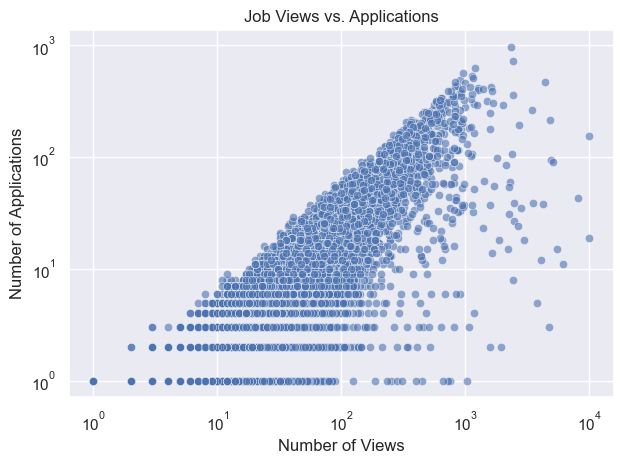

In [15]:
# find the correlation between the number of views and the number of applications of a job
fig, ax = mp.subplots()

sb.scatterplot(all_jobs,
               x     = 'views',
               y     = 'applies',
               alpha =  0.6,
               ax    =  ax)

add_to_plot(fig, ax,
            xlabel = 'Number of Views',
            ylabel = 'Number of Applications',
            title  = 'Job Views vs. Applications',
            xlog   =  True,
            ylog   =  True)

/tmp/ipykernel_1439398/1722634218.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


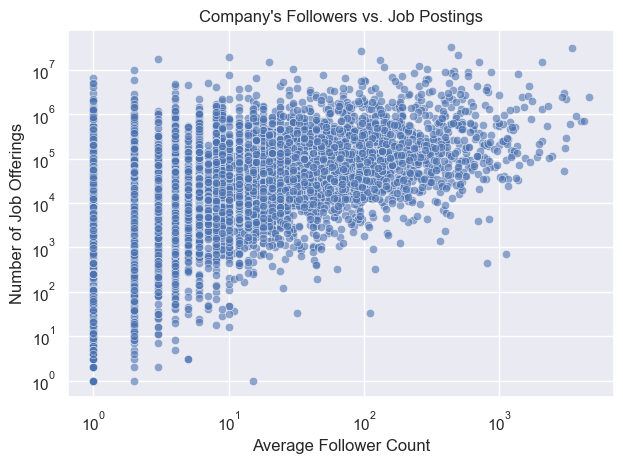

In [16]:
# find the correlation between the number of followers and the number of job offerings of a company
fig, ax = mp.subplots()

sb.scatterplot(all_jobs.merge(employee_counts, on = 'company_id', how = 'left').groupby('company_id')[['job_id', 'follower_count']].agg({
                       'job_id':         'count',
                       'follower_count': 'mean'
                   }),
               x     = 'job_id',
               y     = 'follower_count',
               alpha =  0.6,
               ax    =  ax)

add_to_plot(fig, ax,
            xlabel = 'Average Follower Count',
            ylabel = 'Number of Job Offerings',
            title  = 'Company\'s Followers vs. Job Postings',
            xlog   =  True,
            ylog   =  True)